## **City in Motion**
### Understanding Ridership Trends within the CTA
*Created by Tomasz Puzio, 100904335, 11.01.2024*

##### **Introduction**
Public transit is an important part of our everyday lives. Not only is it a more affordable alternative to owning and driving a car, but it also has a great amount of environmental benefits by greatly reducing greenhouse gas emissions thus reducing our carbon footprint, and helping to lessen traffic congestion. Public transit operators such as the Toronto Transit Commission (TTC), New York City Transit Authority (MTA), and Chicago Transit Authority (CTA) are crucial to providing sustainable, fast transit to such large cities.

The Chicago Transit Authority, abbreviated as the CTA, is the operating body of the public transit system in Chicago, Illinois, United States. Established on October 1, 1947, and stands as the second-largest public transportation system in the United States. The CTA owns and operates 8 rail (subway) lines and 127 bus routes throughout Chicago and its suburbs. Today, the CTA touts 1,514 miles, which is more than 2436 kilometers, of bus routes, and 224 miles, which is more than 360 kilometers, of rail lines. As of 2022, the CTA saw average weekday ridership levels of 762,564 people and reported a weekly average ridership of over 1 million riders in May of 2024.

Public transit systems are not without flaw, however. While they play an essential role in keeping such large cities flowing, major world events can significantly impact their usage and operation. Public health emergencies, economic crises, and shifts in the way society operates has helped to shape public transit and how it is operated.

<img src="https://www.transitchicago.com/assets/1/6/featureheader_busandtrain_washington.jpg" alt="Image of CTA bus and train" width="800"/>

This data comes from The [Chicago Data Poral](https://data.cityofchicago.org/). The data is relatively up to date, with the last update to the data being in August of 2024. The dataset is quite expansive, containing 23 years of daily ridership data broken down by bus, rail, and total ridership. With such an expansive dataset, I thought of 3 questions which I aim to answer in this analysis.
1. The impact of the financial crisis of 2008 on the CTA: Did ridership increase or decrease? Which mode of transport increased or decreased more: bus or rail?
2. The impact of COVID-19 on ridership in 2020: Has ridership reached pre-COVID levels?
3. Which months have the highest ridership? Do some months have higher rail ridership than others? Do some months have higher bus ridership than others?

##### **Importing & Cleaning Data**

In [65]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

Above, we import any nessecary libraries that will help us with data manipulation and visualization. Then we are importing the CSV file containing our data, and printing out a preview of what has been loaded in.

In [66]:
#Importing data.
ridership = pd.read_csv('CTA_Ridership.csv')

In [67]:
ridership

,service_date,day_type,bus,rail_boardings,total_rides
0,1/1/2001,U,297192,126455,423647
1,1/2/2001,W,780827,501952,1282779
2,1/3/2001,W,824923,536432,1361355
3,1/4/2001,W,870021,550011,1420032
4,1/5/2001,W,890426,557917,1448343
...,...,...,...,...,...
8701,8/27/2024,W,583649,409119,992768
8702,8/28/2024,W,637588,442189,1079777
8703,8/29/2024,W,644581,469123,1113704
8704,8/30/2024,W,606824,417283,1024107


Here, we are renaming the column headers to be more clear as to what the data below represents. We are also renaming the items in the 'Day Type' column according to the readme document for the dataset which can be found [here](https://data.cityofchicago.org/Transportation/CTA-Ridership-Daily-Boarding-Totals/6iiy-9s97/about_data). 
To clarify the day type, 'W' was renamed to "Weekday", 'A' to "Saturday", & 'U' to "Sunday/Holiday".

In [68]:
ridership.columns = ["Date", "Day Type", "Bus", "Rail", "Total"]

#Day types are as follows: W = Weekday, A = Saturday, U = Sunday/Holiday.
ridership = ridership.replace({'Day Type': {"W": "Weekday", "A": "Saturday", "U": "Sunday/Holiday"}})
display(ridership)


,Date,Day Type,Bus,Rail,Total
0,1/1/2001,Sunday/Holiday,297192,126455,423647
1,1/2/2001,Weekday,780827,501952,1282779
2,1/3/2001,Weekday,824923,536432,1361355
3,1/4/2001,Weekday,870021,550011,1420032
4,1/5/2001,Weekday,890426,557917,1448343
...,...,...,...,...,...
8701,8/27/2024,Weekday,583649,409119,992768
8702,8/28/2024,Weekday,637588,442189,1079777
8703,8/29/2024,Weekday,644581,469123,1113704
8704,8/30/2024,Weekday,606824,417283,1024107


Here, we are dropping any missing data. As we can see, there is no data missing in the dataset, as the rows before and after dropping the missing data remains the same.

In [69]:
#Dropping any data that is missing, 
print(f"Before dropping: {ridership.shape}")
ridership = ridership.dropna(axis=0)
print(f"After dropping: {ridership.shape}")
#We can see that there was no missing data, as all rows remained the same before and after the drop.

Before dropping: (8706, 5)
After dropping: (8706, 5)


##### **Analysis**

Here, a bar plot for the mean ridership 3 years before and after 2008 will be generated, in order to see any changes before and after 2008. A line plot for ridership by months in 2008 will also be generated. These plots will aid in answering question 1,
> 1. The impact of the financial crisis of 2008 on the CTA: Did ridership increase or decrease? Which mode of transport increased or decreased more: bus or rail?

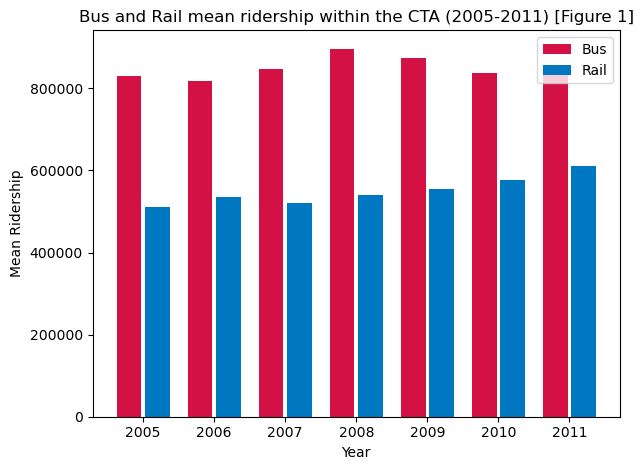

In [70]:
#Convert the 'Date' columns to datetime format.
ridership['Date'] = pd.to_datetime(ridership['Date'])
#Grouping data by year and calculating the mean of 'Bus', 'Rail', and 'Total' ridership.
mean_ridership = ridership.groupby(ridership['Date'].dt.year)[['Bus', 'Rail', 'Total']].mean()

#Filter the data for the years 2005 to 2011.
mean_ridership_FC = mean_ridership.loc[2005:2011]
x = mean_ridership_FC.index

#Generating the plot using side by side bar charts containing 'Bus' and 'Rail' ridership.
plt.bar(x - 0.40 / 2, mean_ridership_FC['Bus'], width = 0.35, label = 'Bus', color = '#D31145')
plt.bar(x + 0.40 / 2, mean_ridership_FC['Rail'], width = 0.35, label = 'Rail', color = '#0078C1')

#Add x & y axix labels, title, and legend.
plt.xlabel('Year')
plt.ylabel('Mean Ridership')
plt.title('Bus and Rail mean ridership within the CTA (2005-2011) [Figure 1]')
plt.legend()

#Display the plot.
plt.tight_layout()
plt.show()


In [71]:
#Create a copy of the ridership data for the year 2008.
ridership_2008 = ridership[ridership['Date'].dt.year == 2008].copy()
#Extract the month from the 'Date' column and add it as a new column.
ridership_2008['Month'] = ridership_2008['Date'].dt.month

#Group the data by 'Month' and calculate the mean ridership of 'Bus', 'Rail', and 'Total'.
ridership_2008_by_month = ridership_2008.groupby('Month')[['Bus', 'Rail', 'Total']].mean()
ridership_2008_by_month = ridership_2008_by_month.reset_index()

#Replace numeric month values (0,1,2,...,12) with the respective month name.
ridership_2008_by_month = ridership_2008_by_month.replace({'Month': {1: "January", 2: "February", 3: "March", 4 : "April", 5 : "May", 6 : "June", 7 : "July", 8 : "August", 9 : "September", 10 : "October", 11 : "November", 12 : "December"}})

#Display the dataframe
display(ridership_2008_by_month)

,Month,Bus,Rail,Total
0,January,7.924363e+05,479268.709677,1.271705e+06
1,February,8.486369e+05,509793.965517,1.358431e+06
2,March,8.503918e+05,497102.548387,1.347494e+06
3,April,9.498285e+05,549831.300000,1.499660e+06
4,May,9.365740e+05,534459.806452,1.471034e+06
5,June,9.230196e+05,565713.000000,1.488733e+06
6,July,9.248209e+05,579314.935484,1.504136e+06
7,August,8.975761e+05,571875.290323,1.469451e+06
8,September,9.776643e+05,593338.733333,1.571003e+06
9,October,1.004289e+06,611208.806452,1.615498e+06


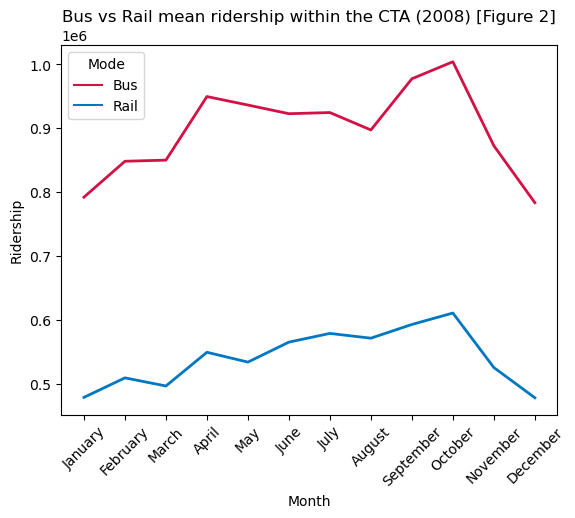

In [72]:
#Reshape the data using .melt for easier plotting.
ridership_2008_by_month_melt = ridership_2008_by_month.melt(id_vars = 'Month', value_vars = ['Bus', 'Rail'], var_name = 'Mode', value_name = 'Ridership')

#Create a line plot displaying 'Bus' and 'Rail' ridership as two different lines. 
plot = sns.lineplot(data = ridership_2008_by_month_melt, x = 'Month', y = 'Ridership', hue = 'Mode', palette = {'Bus': '#D31145', 'Rail': '#0078C1'}, linewidth = 2)

#Add x & y axis labes, and a title.
plot = plot.set(title = "Bus vs Rail mean ridership within the CTA (2008) [Figure 2]", xlabel = 'Month', ylabel = 'Ridership')
#Rotate the month names by 45 degrees on the x axis for better readability.
plt.xticks(rotation = 45)

#Display the plot.
plt.show()

In [73]:
mean_ridership_table = mean_ridership.loc[2005:2011]
#Display the same data shown in the plot above in a dataframe.
display(mean_ridership_table)

,Bus,Rail,Total
Date,,,
2005,830805.950685,511669.931507,1.342476e+06
2006,817625.276712,534710.446575,1.352336e+06
2007,847318.652055,521297.024658,1.368616e+06
2008,896719.172131,541358.614754,1.438078e+06
2009,873076.128767,554983.671233,1.428060e+06
2010,838421.873973,577668.695890,1.416091e+06
2011,853672.080808,610773.002525,1.464445e+06


Here, a line plot for the mean ridership from 2018 to 2024 will be generated in order to view the downward trend in ridership that occured in 2020. This will aid in answering question 2,
> 2. The impact of COVID-19 on ridership in 2020: Has ridership reached pre-COVID levels?

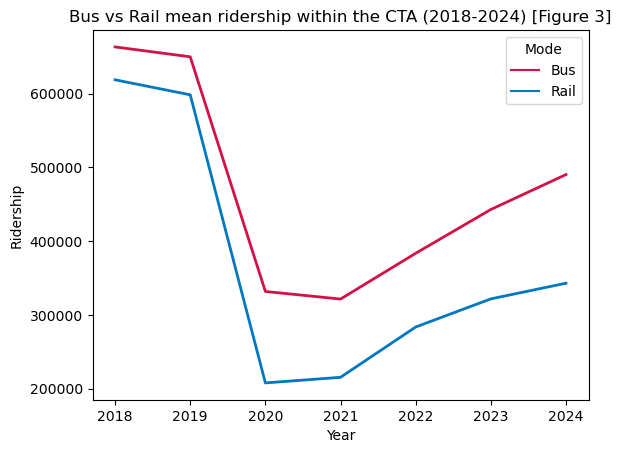

In [74]:
#Filter the data for the years 2018 to 2024.
mean_ridership_covid = mean_ridership.loc[2018:2024]

#Reset the index and prepare to reshape.
mean_ridership_covid = mean_ridership_covid.reset_index()

#Reshape the data using .melt for easier plotting.
mean_ridership_covid = mean_ridership_covid.melt(id_vars = 'Date', value_vars = ['Bus', 'Rail'], var_name = 'Mode', value_name = 'Ridership')

#Create a line plot displaying side by side data for 'Bus' and 'Rail' ridership.
cov = sns.lineplot(data = mean_ridership_covid, x = 'Date', y = 'Ridership', hue = 'Mode', palette = {'Bus': '#D31145', 'Rail': '#0078C1'}, linewidth = 2)

#Add x & y axis labels, and a title.
cov = cov.set(title = "Bus vs Rail mean ridership within the CTA (2018-2024) [Figure 3]", xlabel = 'Year', ylabel = 'Ridership')

#Display the plot.
plt.show()

In [75]:
mean_ridership_table_covid = mean_ridership.loc[2018:2024]
#Display the same data shown in the plot above in a dataframe.
display(mean_ridership_table_covid)

,Bus,Rail,Total
Date,,,
2018,663487.682192,618890.282192,1.282378e+06
2019,650072.326027,598540.112329,1.248612e+06
2020,331830.382514,207786.532787,5.396169e+05
2021,321527.457534,215405.610959,5.369331e+05
2022,383599.868493,283629.747945,6.672296e+05
2023,443011.939726,321772.986301,7.647849e+05
2024,490379.741803,343039.520492,8.334193e+05


In [76]:
#Find the mean total ridership levels in 2018 and 2020.
pre_covid_total = mean_ridership.loc[2018]
covid_total = mean_ridership.loc[2020]

#Compare the mean total ridership levels from 2018 to 2020, rounding to 3 decimal places.
print(f"Pre COVID-19 Mean Total Ridership:", pre_covid_total.Total.round(3))
print(f"COVID-19 Mean Total Ridership:", covid_total.Total.round(3))

#Calculate the percentage of ridership decrease between 2018 and 2020, rounding to 3 decimal places.
percentage_decrease = ((pre_covid_total.Total - covid_total.Total) / pre_covid_total.Total) * 100

#Print the ridership decrease percentage.
print(f"Percent Decrease:", percentage_decrease.round(3))

Pre COVID-19 Mean Total Ridership: 1282377.964
COVID-19 Mean Total Ridership: 539616.915
Percent Decrease: 57.921


Here, a line plot for the mean ridership in 2017 will be generated to view monthly ridership trends. This will aid in answering question 3,
> 3. Which months have the highest ridership? Do some months have higher rail ridership than others? Do some months have higher bus ridership than others?

In [77]:
#Create a copy of the ridership data for the year 2017.
ridership_2017 = ridership[ridership['Date'].dt.year == 2017].copy()
#Extract the month from the 'Date' column and add it as a new column.
ridership_2017['Month'] = ridership_2017['Date'].dt.month

#Group the data by 'Month' and calculate the mean ridership of 'Bus', 'Rail', and 'Total'.
ridership_2017_by_month = ridership_2017.groupby('Month')[['Bus', 'Rail', 'Total']].mean()
ridership_2017_by_month = ridership_2017_by_month.reset_index()

#Replace numeric month values (0,1,2,...,12) with the respective month name.
ridership_2017_by_month = ridership_2017_by_month.replace({'Month': {1: "January", 2: "February", 3: "March", 4 : "April", 5 : "May", 6 : "June", 7 : "July", 8 : "August", 9 : "September", 10 : "October", 11 : "November", 12 : "December"}})

#Display the dataframe
display(ridership_2017_by_month)

,Month,Bus,Rail,Total
0,January,631314.516129,577464.322581,1.208779e+06
1,February,710742.464286,616288.678571,1.327031e+06
2,March,713628.225806,633108.290323,1.346737e+06
3,April,670381.733333,620202.033333,1.290584e+06
4,May,707550.354839,641816.774194,1.349367e+06
5,June,702550.533333,682970.066667,1.385521e+06
6,July,638225.870968,626624.677419,1.264851e+06
7,August,673485.354839,667237.258065,1.340723e+06
8,September,729859.800000,672521.400000,1.402381e+06
9,October,727201.516129,679840.838710,1.407042e+06


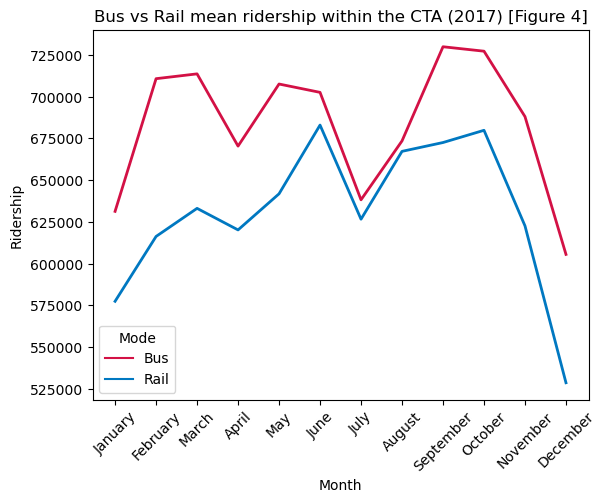

In [78]:
#Reshape the data using .melt for easier plotting.
ridership_2017_by_month_melt = ridership_2017_by_month.melt(id_vars = 'Month', value_vars = ['Bus', 'Rail'], var_name = 'Mode', value_name = 'Ridership')

#Create a line plot displaying 'Bus' and 'Rail' ridership as two different lines. 
plot = sns.lineplot(data = ridership_2017_by_month_melt, x = 'Month', y = 'Ridership', hue = 'Mode', palette = {'Bus': '#D31145', 'Rail': '#0078C1'}, linewidth = 2)

#Add x & y axis labes, and a title.
plot = plot.set(title = "Bus vs Rail mean ridership within the CTA (2017) [Figure 4]", xlabel = 'Month', ylabel = 'Ridership')
#Rotate the month names by 45 degrees on the x axis for better readability.
plt.xticks(rotation = 45)

#Display the plot.
plt.show()

##### **Discussion**
As previously stated, there were 3 questions I wanted to answer in this analysis:
1. The impact of the financial crisis of 2008 on the CTA: Did ridership increase or decrease? Which mode of transport increased or decreased more: bus or rail?
2. The impact of COVID-19 on ridership in 2020: Has ridership reached pre-COVID levels?
3. Which months have the highest or lowest ridership? Do some months have higher rail ridership than others? Do some months have higher bus ridership than others?

I expected to see a mass increase in ridership during the 2008 financial crisis, however, the analysis proved otherwise. I anticipated that due to the high cost of living would drive an increase in a cheaper alternative- public transit, however, there seemed to be very little impact on the CTA's ridership levels when compared to years before and after *(Figure 1)*. However when focusing on 2008 by month, we do begin to see an increase in both bus and rail usage in September and October *(Figure 2)*, the peak of the crisis when major financial institutions went bankrupt, and major U.S. indexes were suffering some of their worst losses ever recorded.

The COVID-19 pandemic in 2020 caused a massive decrease in ridership *(Figure 3)*, with total CTA ridership decreasing by approximately 58%. This decrease was largely driven by strict lockdowns, social & physical distancing measures, and the shift to remote work and school, ultimately resulting in a reduced need for commuting. As a result of the pandemic, the mode of transit that saw the biggest ridership decline was rail, likely due to measures implemented by the CTA in favour of public health, and reduced need to commute to the high-density, urban center of Chicago. As of August 2024 (The most recent update to the dataset), ridership has grown significantly but remains slightly lower than pre-COVID-19 levels. The decline in CTA ridership due to COVID-19 is not unique to Chicago. Many transit agencies around the world have struggled with and continue to struggle with re-gaining pre-2020 levels of ridership. The COVID-19 pandemic caused a mass shift in the way people work, with many companies shifting to hybrid or fully remote work options, which will continue to affect ridership levels not only in Chicago but worldwide.

To determine which months have the highest or lowest ridership levels, the year 2017 was randomly selected. This year was chosen as it was not affected by any significant event, such as a financial crisis, or a global pandemic. This analysis revealed that September had the highest ridership levels, with December having the lowest *(Figure 4)*. This information aligns with my expectations, September likely has an increased ridership due to people, mainly students, returning from summer break. December's lower ridership, however, is likely due to vacations during the holidays, cold weather discouraging travel, and students finishing classes for winter break. Throughout 2017, bus travel had the highest ridership, with a peak occurring in September. This is not unsurprising, given the expansive 1,514 miles of bus routes compared to the 224 miles of rail lines, ultimately resulting in more bus travel. In fact, over all of the years analyzed, buses consistently saw higher ridership levels, this again being due to the number of bus routes compared to rail lines.


##### **References**
Image : https://www.transitchicago.com/about/ <br>
Data : https://data.cityofchicago.org/Transportation/CTA-Ridership-Daily-Boarding-Totals/6iiy-9s97/about_data